# Survey EDA based on care giver

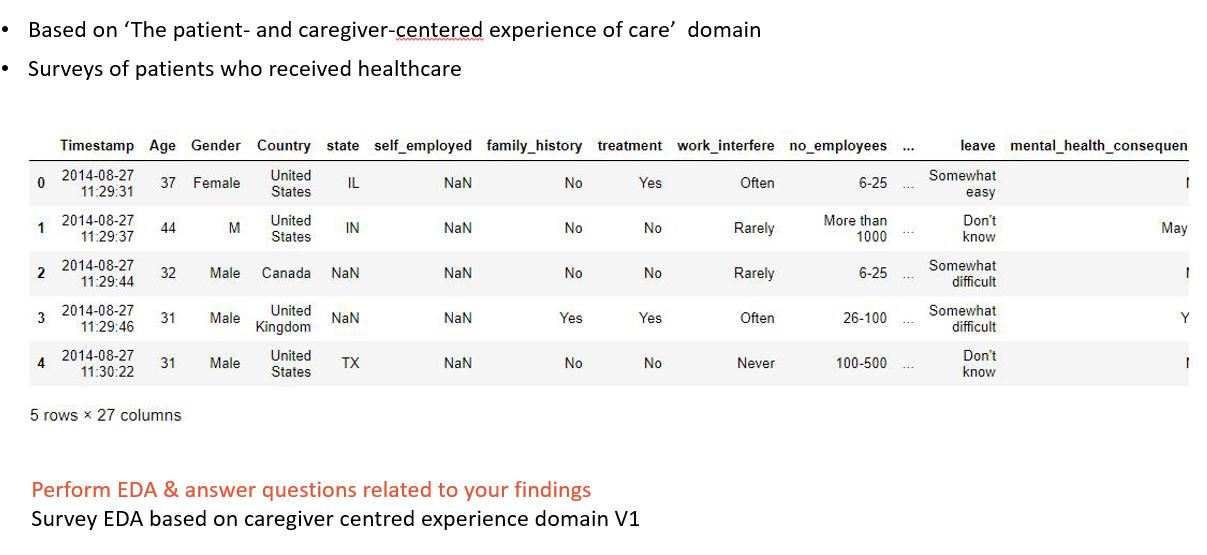

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:

df = pd.read_csv('./Datasets/Input1/survey.csv')

In [5]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Question 1# What is your initial conclusion looking at the table above?

In [6]:
df.shape #Rows and columns

(1259, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [8]:
df.groupby("Age").size()

Age
-1726            1
-29              1
-1               1
 5               1
 8               1
 11              1
 18              7
 19              9
 20              6
 21             16
 22             21
 23             51
 24             46
 25             61
 26             75
 27             71
 28             68
 29             85
 30             63
 31             67
 32             82
 33             70
 34             65
 35             55
 36             37
 37             43
 38             39
 39             33
 40             33
 41             21
 42             20
 43             28
 44             11
 45             12
 46             12
 47              2
 48              6
 49              4
 50              6
 51              5
 53              1
 54              3
 55              3
 56              4
 57              3
 58              1
 60              2
 61              1
 62              1
 65              1
 72              1
 329             1
 9999999

# Question2 : What does negative age signify? 

# Ravi codes for data cleansing as age is below 0

In [9]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(age_process)

Text(0, 0.5, 'Freq')

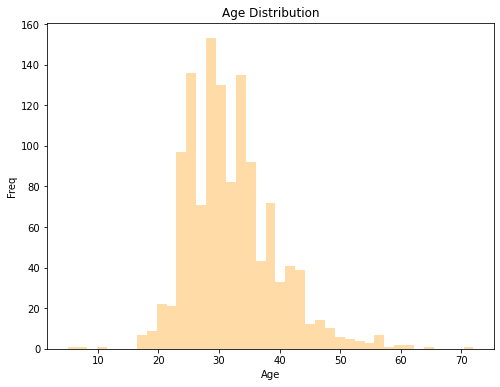

In [10]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#ffa726')
plt.title('Age Distribution')
plt.ylabel('Freq')

# Question 3# What do you interpret from the histogram above?

In [11]:
# most_common Return a list of the n most common elements and their counts from the most common to the least. 
#If n is omitted or None, most_common() returns all elements in the counter. 
#Elements with equal counts are ordered arbitrarily:
country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_count

[('United States', 751),
 ('United Kingdom', 185),
 ('Canada', 72),
 ('Germany', 45),
 ('Netherlands', 27),
 ('Ireland', 27),
 ('Australia', 21),
 ('France', 13),
 ('India', 10),
 ('New Zealand', 8)]

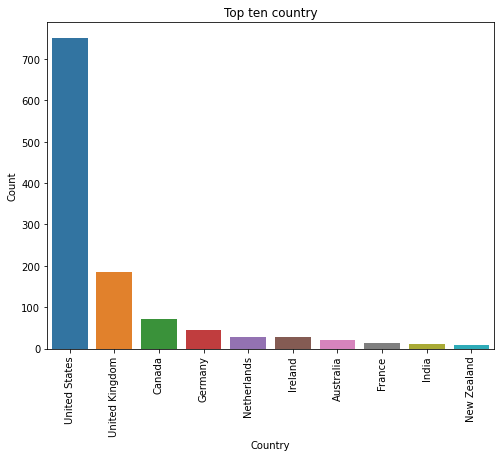

In [12]:
country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count] # Define X axis
country_val = [country[1] for country in country_count] # Define Y axis
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')
df['Year'] = df['Timestamp'].apply(lambda x:x.year)

Text(0.5, 1.0, 'Treatement Distribution')

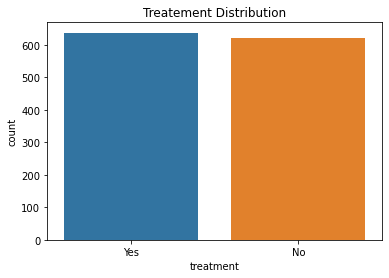

In [14]:
sns.countplot(df['treatment'])
plt.title('Treatement Distribution')

In [15]:
df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

Text(0.5, 1.0, 'Age vs family_history')

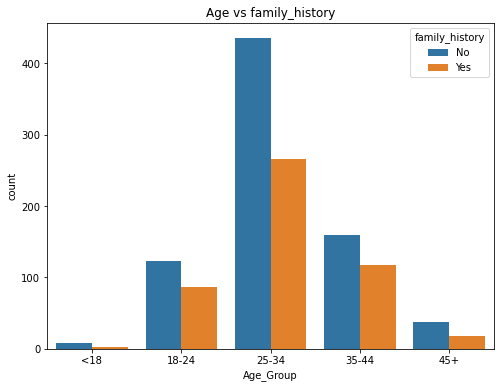

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x = 'Age_Group',hue= 'family_history',ax=ax)
plt.title('Age vs family_history')

Text(0.5, 1.0, 'Age Group vs Treatment')

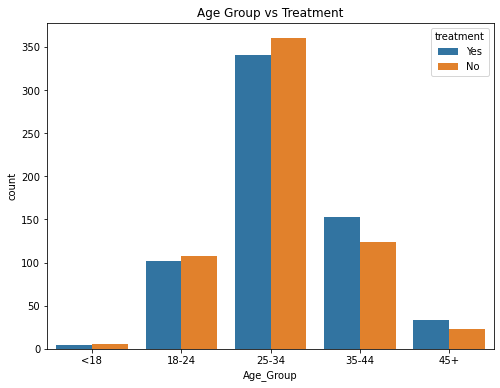

In [17]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'Age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

Text(0, 0.5, 'Count')

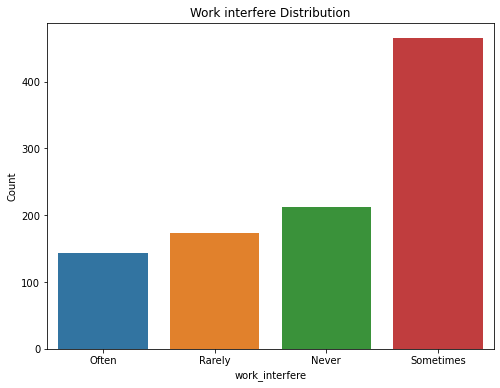

In [18]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

Text(0.5, 0, 'employee group')

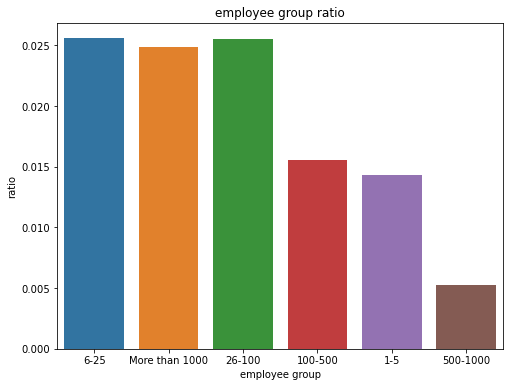

In [19]:
fig,ax = plt.subplots(figsize=(8,6))
total = df['no_employees'].dropna().shape[0] * 9.0
employee_count  = Counter(df['no_employees'].dropna().tolist())
for key,val in employee_count.items():
    employee_count[key] = employee_count[key] / total
employee_group = np.asarray(list(employee_count.keys()))
employee_val = np.asarray(list(employee_count.values()))
sns.barplot(x = employee_group , y = employee_val)
plt.title('employee group ratio')
plt.ylabel('ratio')
plt.xlabel('employee group')

Text(0.5, 1.0, 'no_employee vs tech_company')

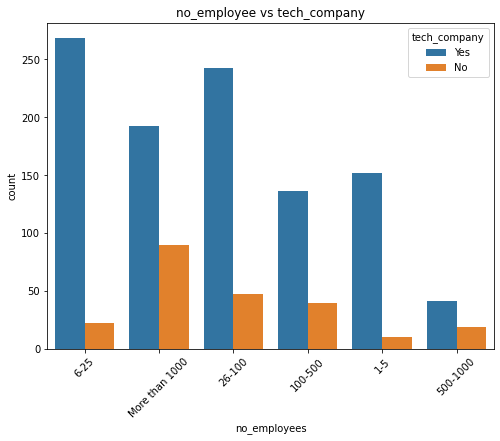

In [20]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'no_employees', hue ='tech_company',ax=ax )
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('no_employee vs tech_company')

Text(0.5, 1.0, 'no_employee vs remote_work')

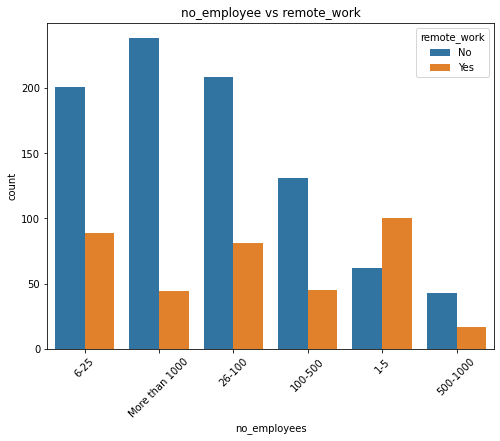

In [21]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'no_employees', hue ='remote_work',ax=ax )
ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('no_employee vs remote_work')